### Question 2

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import hw2q2 # importing given code

np.random.seed(86)

### Equations and definitions

In [181]:
# helper functions
def poly3_features(X):
    pf = PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
    Z = pf.fit_transform(X.T) # (N,2) -> (N, 10)
    names = pf.get_feature_names_out(["x1", "x2"])
    return Z, names  # names helps you see the exact column order

def model_mean(X, w):
    Z, _ = poly3_features(X)
    return Z @ w

In [182]:
def fit_ml(Z, y):
    """Using derived formula for MLE: w_ML = (Z^T Z)^(-1) Z^T y """
    return np.linalg.pinv(Z).dot(y)  # @ is matrix multiplication in numpy btw

def fit_map(Z, y, gamma, sigma2 = 1):
    """ Using derived formula for MAP: w_MAP = (Z^T Z + (sigma2/gamma) I)^(-1) Z^T y """
    d = Z.shape[1]
    lambda_ = sigma2 / gamma # ridge parameter
    A = Z.T @ Z + lambda_ * np.eye(d)
    return np.linalg.solve(A, Z.T.dot(y)) # use linalg.solve instead of inv

### Using the provided script for data

In [183]:
# get data
xTrain, yTrain, xValidate, yValidate = hw2q2.hw2q2()
print(yTrain.shape, yValidate.shape)

# reshape
yTrain = yTrain.reshape(-1,1)
yValidate = yValidate.reshape(-1,1)
print(yTrain.shape, yValidate.shape)

# show data
print(xTrain.shape, yTrain.shape, xValidate.shape, yValidate.shape)

(100,) (1000,)
(100, 1) (1000, 1)
(2, 100) (100, 1) (2, 1000) (1000, 1)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [184]:
# design matrixes
zTrain, names = poly3_features(xTrain)
zValidate, _ = poly3_features(xValidate)

In [194]:
# ML fit
w_ml = fit_ml(zTrain, yTrain)

# grid for gamma (# from 10^-6 (m=6) to 10^6 (n=6))
gammas = np.logspace(-7, 6, 61)

# fit MAP for each gamma
w_map_list = [fit_map(zTrain, yTrain, g, sigma2=1.0) for g in gammas]

In [195]:
# ML validation MSE
mse_ml = mean_squared_error(yValidate, zValidate.dot(w_ml)) # dot is matrix multiplication

# MAP validation MSEs over gamma
mse_map = np.array([mean_squared_error(yValidate, zValidate.dot(w_map)) for w_map in w_map_list])

# best MAP
best_idx = int(np.argmin(mse_map))
best_gamma = float(gammas[best_idx])
best_mse_map = float(mse_map[best_idx])

# print results
print(f"MLE validation MSE: {mse_ml:.3f}")
print(f"MAP validation MSEs over gamma (γ): {mse_map}")
print(f"Best MAP validation MSE = {best_mse_map:.4f} at gamma (γ) = {best_gamma:.3e}")

MLE validation MSE: 5.044
MAP validation MSEs over gamma (γ): [5.51673929 4.91907212 4.67870145 4.59981228 4.59726125 4.635469
 4.69513805 4.76087029 4.82092835 4.86941256 4.90576836 4.93230775
 4.95183429 4.96635937 4.97691483 4.98388029 4.98727471 4.98712068
 4.98406713 4.97966651 4.97571301 4.9732817  4.97250524 4.9730786
 4.97484806 4.97811587 4.9835178  4.99142624 5.00128373 5.01163609
 5.02094646 5.02833728 5.03368876 5.03732512 5.03969458 5.04119764
 5.04213518 5.0427139  5.04306885 5.0432857  5.04341786 5.04349829
 5.04354719 5.04357691 5.04359497 5.04360593 5.04361259 5.04361664
 5.04361909 5.04362058 5.04362149 5.04362204 5.04362237 5.04362258
 5.0436227  5.04362277 5.04362282 5.04362285 5.04362286 5.04362287
 5.04362288]
Best MAP validation MSE = 4.5973 at gamma (γ) = 7.356e-07


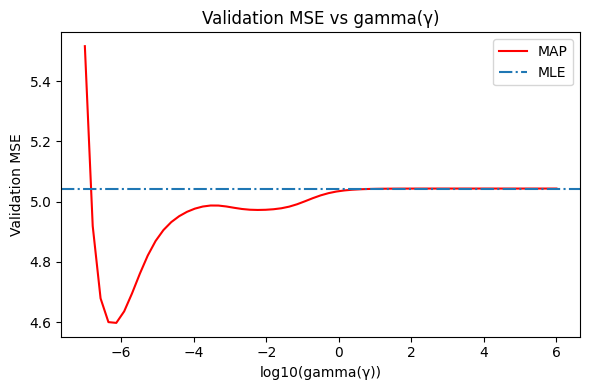

In [196]:
# plot MSE vs gamma -> shows performance as γ is varied
plt.figure(figsize=(6,4))
plt.plot(np.log10(gammas), mse_map, color="r", label="MAP") # plot MAP MSE vs gamma
plt.axhline(mse_ml, linestyle="-.", label="MLE")

plt.xlabel("log10(gamma(γ))")
plt.ylabel("Validation MSE")
plt.title("Validation MSE vs gamma(γ)")
plt.legend()
plt.tight_layout()
plt.show()